In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
train = pd.read_csv(r'C:\Users\Sush\Desktop\Loan_Prediction\train.csv')

In [5]:
test = pd.read_csv(r'C:\Users\Sush\Desktop\Loan_Prediction\test.csv')

In [6]:
train.shape

(614, 13)

In [7]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
#To check whether there are null values or not 
train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Filter categorical variables
categorical_columns = [x for x in train.dtypes.index if train.dtypes[x]=='object']

In [11]:

categorical_columns = pd.DataFrame(columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status','Credit_History'])

In [12]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (train[col].value_counts())


Frequency of Categories for varible Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for varible Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for varible Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for varible Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for varible Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for varible Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of Categories for varible Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of Categories for varible Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


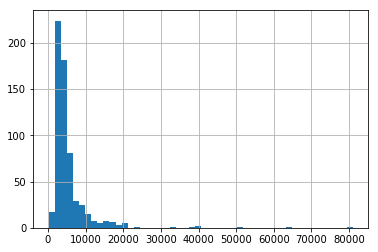

In [13]:
train['ApplicantIncome'].hist(bins=50)

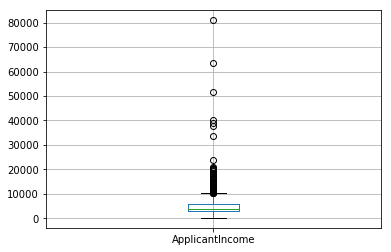

In [14]:
# We find there are many outliers

train.boxplot(column='ApplicantIncome')

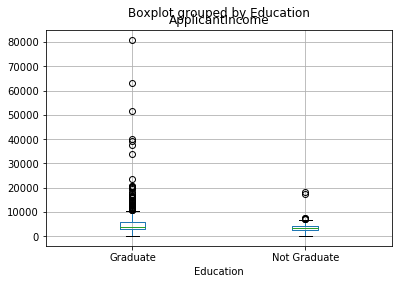

In [15]:
train.boxplot(column='ApplicantIncome', by = 'Education')

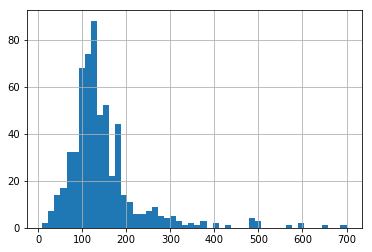

In [16]:
train['LoanAmount'].hist(bins=50)

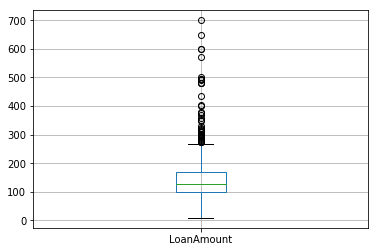

In [17]:
train.boxplot(column='LoanAmount')

In [18]:
temp1 = train['Credit_History'].value_counts(ascending=True)


In [19]:
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [20]:
print ('Frequency Table for Credit History:')
print (temp1)


Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [21]:
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)



Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


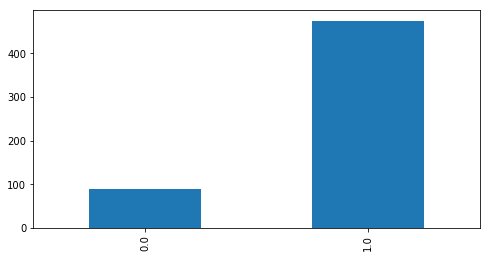

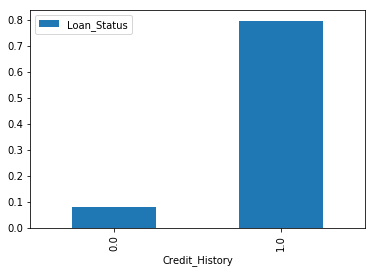

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

temp1.plot(kind='bar')
temp2.plot(kind = 'bar')

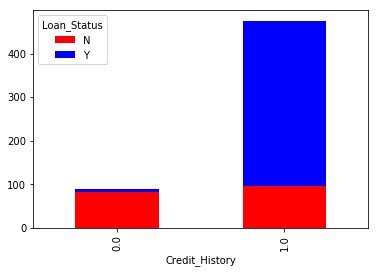

In [23]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

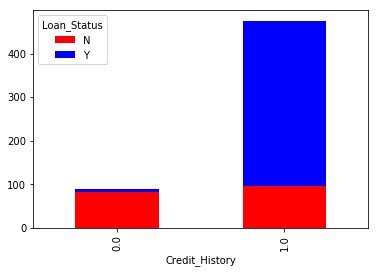

In [24]:
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)



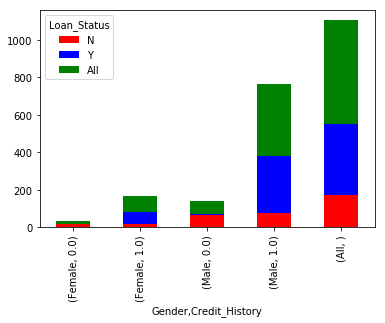

In [25]:
temp3 = pd.crosstab([train.Gender,train.Credit_History], train.Loan_Status,  margins=True)
temp3.plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False)

In [26]:
#To check whether there are null values or not 
train.apply(lambda x: sum(x.isnull()))


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# Fill the Loam Amount with mean
train['Credit_History'].fillna(train['Credit_History'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

In [28]:
#Frequency of Categories for varible Self_Employed
#No     500
#Yes     82
#Name: Self_Employed, dtype: int64
#Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

train['Self_Employed'].fillna('No',inplace=True)
train['Gender'].fillna('Male',inplace=True)
train['Married'].fillna('Yes',inplace=True)
train['Dependents'].fillna('0',inplace=True)


In [29]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table


In [30]:
table

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0

In [31]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)


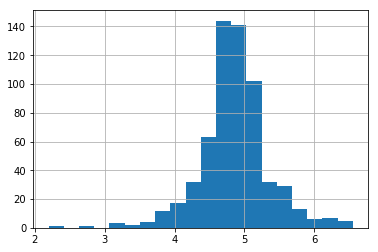

In [32]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

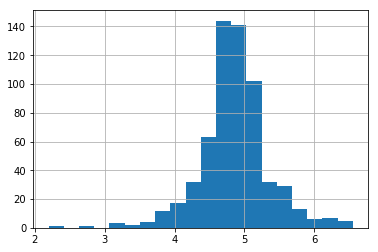

In [33]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20) 

In [34]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    train.dtypes 

In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\Sush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
        model.fit(data[predictors],data[outcome]) 

In [38]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train ,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [39]:
# without credit history which means credit history has a dominating case here
model = DecisionTreeClassifier()
predictor_var = ['Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)


Accuracy : 68.730%
Cross-Validation Score : 67.480%
Cross-Validation Score : 67.886%
Cross-Validation Score : 68.835%
Cross-Validation Score : 68.902%
Cross-Validation Score : 68.729%


In [40]:
train.dtypes
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term']
classification_model(model, train ,predictor_var,outcome_var)

Accuracy : 81.270%
Cross-Validation Score : 78.862%
Cross-Validation Score : 76.829%
Cross-Validation Score : 78.320%
Cross-Validation Score : 80.081%
Cross-Validation Score : 80.295%


In [198]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train ,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 75.610%
Cross-Validation Score : 73.984%
Cross-Validation Score : 75.068%
Cross-Validation Score : 76.423%
Cross-Validation Score : 77.040%


In [199]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.271312
Credit_History      0.266500
LoanAmount_log      0.225006
Dependents          0.053015
Property_Area       0.050329
Loan_Amount_Term    0.042862
Married             0.025919
Education           0.023434
Gender              0.021367
Self_Employed       0.020255
dtype: float64


In [41]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train ,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 78.862%
Cross-Validation Score : 77.642%
Cross-Validation Score : 78.862%
Cross-Validation Score : 80.285%
Cross-Validation Score : 80.785%


In [42]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train ,predictor_var,outcome_var)

Accuracy : 82.899%
Cross-Validation Score : 79.675%
Cross-Validation Score : 78.049%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.285%
Cross-Validation Score : 80.293%


In [43]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [44]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 73.984%
Cross-Validation Score : 71.545%
Cross-Validation Score : 70.732%
Cross-Validation Score : 70.732%
Cross-Validation Score : 69.208%
